In [1]:
import sys, os
sys.path.extend([os.path.abspath('../')])
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from qgs.params.params import QgParams
from qgs.integrators.integrator import RungeKuttaIntegrator, RungeKuttaTglsIntegrator
from qgs.functions.tendencies import create_tendencies
from qgs.plotting.util import std_plot


Below I am loading Robin's parameters

In [2]:
import pickle
# loading the model
with open('model1.pickle', "rb") as file:
    model = pickle.load(file)

f = model['f']
Df = model['Df']
model_parameters = model['parameters']
# Printing the model's parameters
model_parameters.print_params()

Qgs v0.2.5 parameters summary

General Parameters:
'time_unit': days,
'rr': 287.058  [J][kg^-1][K^-1]  (gas constant of dry air),
'sb': 5.67e-08  [J][m^-2][s^-1][K^-4]  (Stefan-Boltzmann constant),

Scale Parameters:
'scale': 5000000.0  [m]  (characteristic space scale (L*pi)),
'f0': 0.0001032  [s^-1]  (Coriolis parameter at the middle of the domain),
'n': 0.353    (aspect ratio (n = 2 L_y / L_x)),
'rra': 6370000.0  [m]  (earth radius),
'phi0_npi': 0.25    (latitude expressed in fraction of pi),
'deltap': 50000.0  [Pa]  (pressure difference between the two atmospheric layers),

Atmospheric Parameters:
'kd': 0.1  [nondim]  (atmosphere bottom friction coefficient),
'kdp': 0.01  [nondim]  (atmosphere internal friction coefficient),
'sigma': 0.2  [nondim]  (static stability of the atmosphere),

Atmospheric Temperature Parameters:
'gamma': 10000000.0  [J][m^-2][K^-1]  (specific heat capacity of the atmosphere),
'C[1]': 112.0  [W][m^-2]  (spectral component 1 of the short-wave radiation of t

/home/scratch01/gmiloshe/qgs/qgs/params/parameter.py:106: UserWarning: Parameter configured to perform dimensional conversion but without specifying a ScaleParams object: Conversion disabled!
  warnings.warn("Parameter configured to perform dimensional conversion " +


I am selecting standard parameters for the runs below, not sure if this is what Robin is using

In [3]:
# Time parameters
dt = 0.1
# Saving the model state n steps
write_steps = 5

number_of_trajectories = 1
number_of_perturbed_trajectories = 10

Again I am using standard period of waiting, perhaps a longer is necessary with so many components?

In [4]:
model_parameters.latex_var_string

['{\\psi_{\\rm a,1}}',
 '{\\psi_{\\rm a,2}}',
 '{\\psi_{\\rm a,3}}',
 '{\\psi_{\\rm a,4}}',
 '{\\psi_{\\rm a,5}}',
 '{\\psi_{\\rm a,6}}',
 '{\\psi_{\\rm a,7}}',
 '{\\psi_{\\rm a,8}}',
 '{\\psi_{\\rm a,9}}',
 '{\\psi_{\\rm a,10}}',
 '{\\psi_{\\rm a,11}}',
 '{\\psi_{\\rm a,12}}',
 '{\\psi_{\\rm a,13}}',
 '{\\psi_{\\rm a,14}}',
 '{\\psi_{\\rm a,15}}',
 '{\\psi_{\\rm a,16}}',
 '{\\psi_{\\rm a,17}}',
 '{\\psi_{\\rm a,18}}',
 '{\\psi_{\\rm a,19}}',
 '{\\psi_{\\rm a,20}}',
 '{\\psi_{\\rm a,21}}',
 '{\\psi_{\\rm a,22}}',
 '{\\psi_{\\rm a,23}}',
 '{\\psi_{\\rm a,24}}',
 '{\\psi_{\\rm a,25}}',
 '{\\psi_{\\rm a,26}}',
 '{\\psi_{\\rm a,27}}',
 '{\\psi_{\\rm a,28}}',
 '{\\psi_{\\rm a,29}}',
 '{\\psi_{\\rm a,30}}',
 '{\\psi_{\\rm a,31}}',
 '{\\psi_{\\rm a,32}}',
 '{\\psi_{\\rm a,33}}',
 '{\\psi_{\\rm a,34}}',
 '{\\psi_{\\rm a,35}}',
 '{\\psi_{\\rm a,36}}',
 '{\\theta_{\\rm a,1}}',
 '{\\theta_{\\rm a,2}}',
 '{\\theta_{\\rm a,3}}',
 '{\\theta_{\\rm a,4}}',
 '{\\theta_{\\rm a,5}}',
 '{\\theta_{\\rm a,6

In [5]:
%%time
integrator = RungeKuttaIntegrator()
integrator.set_func(f)

ic = np.random.rand(model_parameters.ndim)*0.1
integrator.integrate(0., 200000., dt, ic=ic, write_steps=0)
time, ic = integrator.get_trajectories()

CPU times: user 41.8 ms, sys: 122 ms, total: 164 ms
Wall time: 2min 6s


Now we run the part that we are going to save

In [6]:
%%time
integrator.integrate(0., 200000., dt, ic=ic, write_steps=write_steps)
reference_time, reference_traj = integrator.get_trajectories()
print(f"{len(reference_time) = }, {len(reference_traj) = }, {reference_traj.shape = }")

len(reference_time) = 400001, len(reference_traj) = 108, reference_traj.shape = (108, 400001)
CPU times: user 534 ms, sys: 1.04 s, total: 1.57 s
Wall time: 2min


On to some visualizations, below we are considering the evolution of three parameters simultaneously:

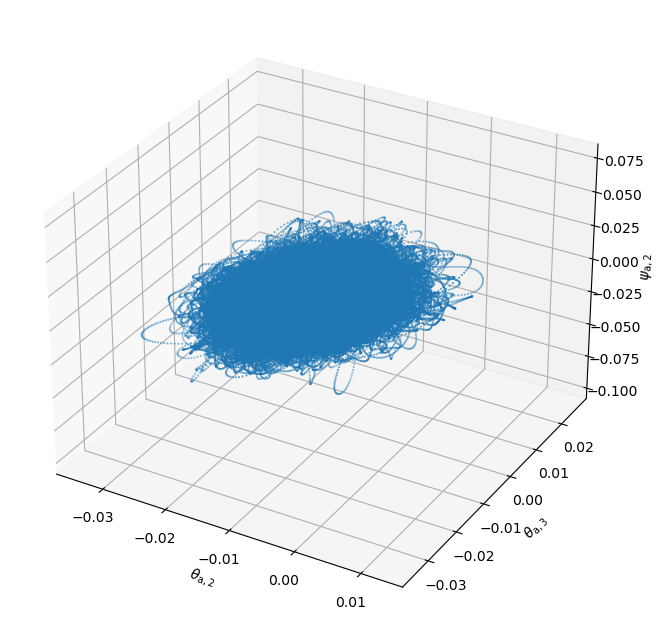

In [8]:
varx = 37
vary = 38
varz = 1

fig = plt.figure(figsize=(10, 8))
axi = fig.add_subplot(111, projection='3d')

axi.scatter(reference_traj[varx], reference_traj[vary], reference_traj[varz], s=0.2);

axi.set_xlabel('$'+model_parameters.latex_var_string[varx]+'$')
axi.set_ylabel('$'+model_parameters.latex_var_string[vary]+'$')
axi.set_zlabel('$'+model_parameters.latex_var_string[varz]+'$');

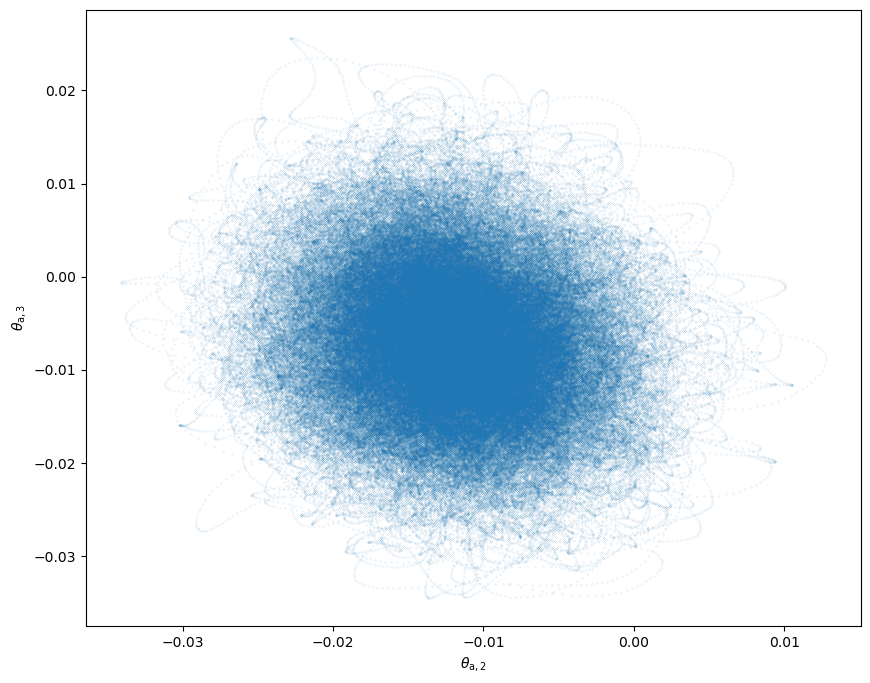

In [9]:
varx = 37
vary = 38
plt.figure(figsize=(10, 8))

plt.plot(reference_traj[varx], reference_traj[vary], marker='o', ms=0.07, ls='')

plt.xlabel('$'+model_parameters.latex_var_string[varx]+'$')
plt.ylabel('$'+model_parameters.latex_var_string[vary]+'$');

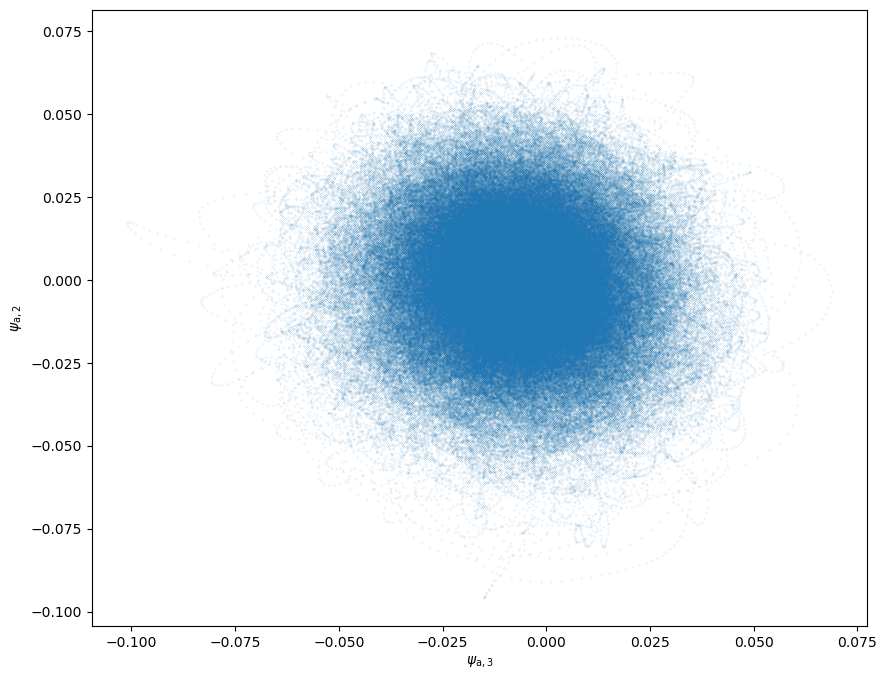

In [10]:
varx = 2
vary = 1
plt.figure(figsize=(10, 8))

plt.plot(reference_traj[varx], reference_traj[vary], marker='o', ms=0.07, ls='')

plt.xlabel('$'+model_parameters.latex_var_string[varx]+'$')
plt.ylabel('$'+model_parameters.latex_var_string[vary]+'$');

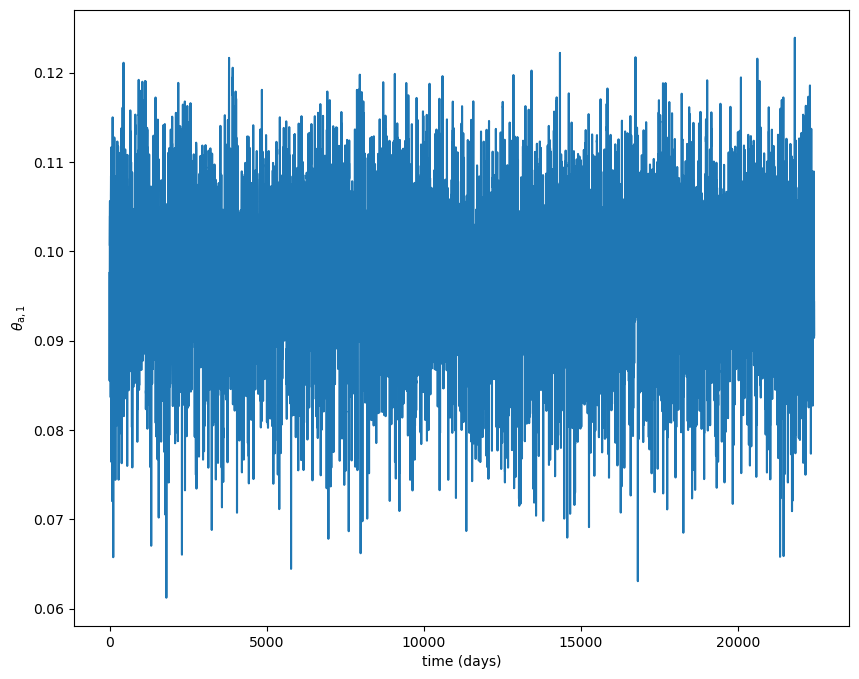

In [11]:
var = 36
plt.figure(figsize=(10, 8))

plt.plot(model_parameters.dimensional_time*reference_time, reference_traj[var])

plt.xlabel('time (days)')
plt.ylabel('$'+model_parameters.latex_var_string[var]+'$');

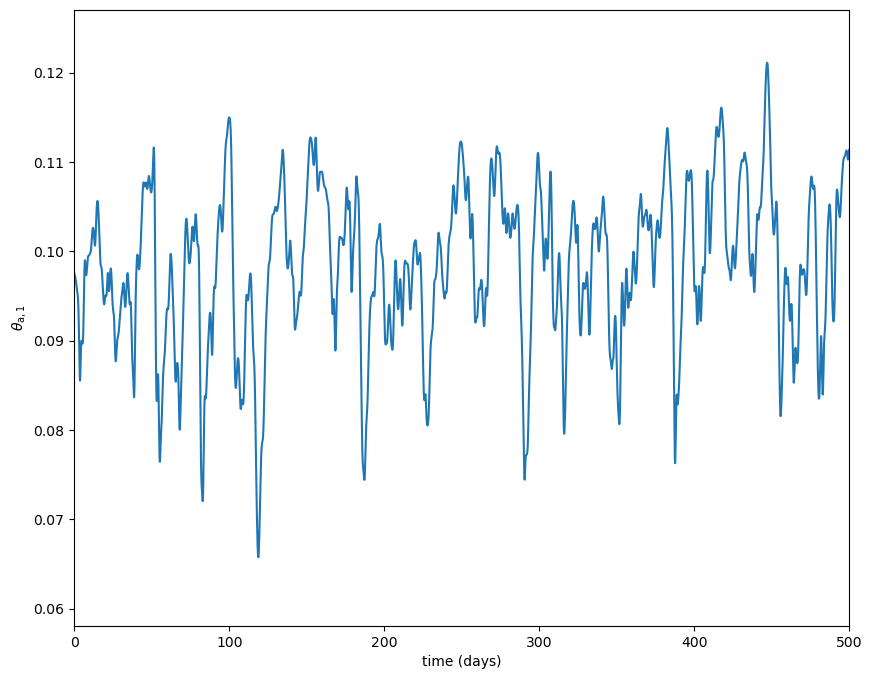

In [13]:
var = 36
plt.figure(figsize=(10, 8))

plt.plot(model_parameters.dimensional_time*reference_time, reference_traj[var])
plt.xlim([0,500])
plt.xlabel('time (days)')
plt.ylabel('$'+model_parameters.latex_var_string[var]+'$');

## Initial condition sensitivity analysis example
Instantiating a tangent linear integrator with the model tendencies

In [14]:
tgls_integrator = RungeKuttaTglsIntegrator()
tgls_integrator.set_func(f, Df)

Integrating with slightly perturbed initial conditions

In [15]:
print(f"{number_of_perturbed_trajectories = }, {model_parameters.ndim = }")
tangent_ic = 0.00001*np.random.randn(number_of_perturbed_trajectories, model_parameters.ndim)
print(f"{tangent_ic.shape = }, for example {tangent_ic[0,0] = }")

number_of_perturbed_trajectories = 10, model_parameters.ndim = 108
tangent_ic.shape = (10, 108), for example tangent_ic[0,0] = -2.213897677625528e-05


Below we will re-use the initial conditions that are already relaxed on the attractor

In [20]:
%%time 
print(f"{write_steps = }")
tgls_integrator.integrate(0., 500., dt=dt, write_steps=write_steps, ic=ic, tg_ic=tangent_ic)

write_steps = 5
CPU times: user 16.8 ms, sys: 17.3 ms, total: 34.1 ms
Wall time: 12.8 s


Obtaining the perturbed trajectories

In [21]:
time, traj, delta = tgls_integrator.get_trajectories()
pert_traj = traj + delta
print(f"{len(model_parameters.dimensional_time*time) = }, {len(traj[var]) = }")

len(model_parameters.dimensional_time*time) = 1001, len(traj[var]) = 1001


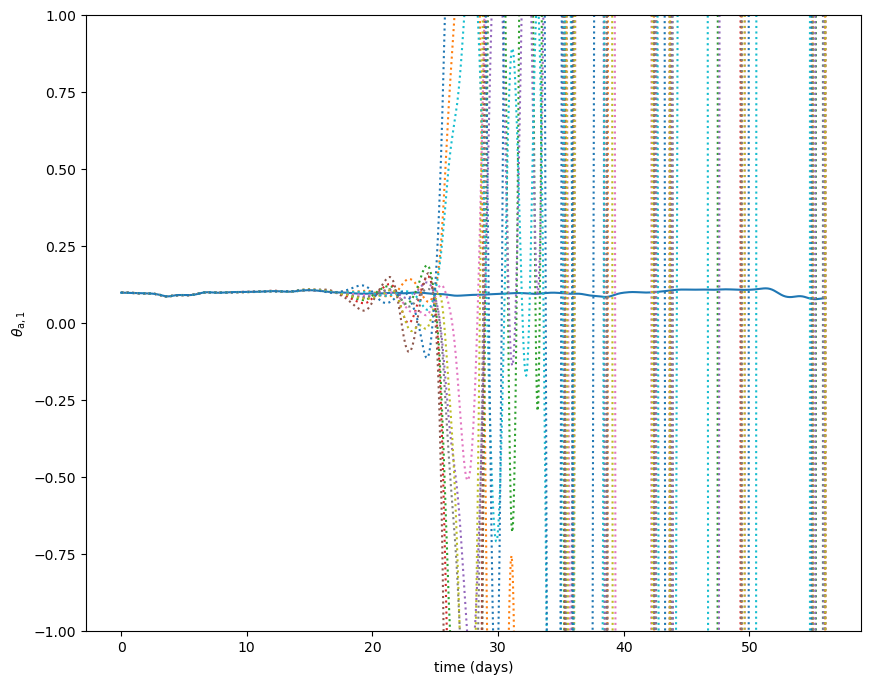

In [26]:
var = 36
plt.figure(figsize=(10, 8))

plt.plot(model_parameters.dimensional_time*time, traj[var])
plt.plot(model_parameters.dimensional_time*time, pert_traj[:,var].T, ls=':')

ax = plt.gca()
plt.ylim([-1,1])
plt.xlabel('time (days)')
plt.ylabel('$'+model_parameters.latex_var_string[var]+'$');

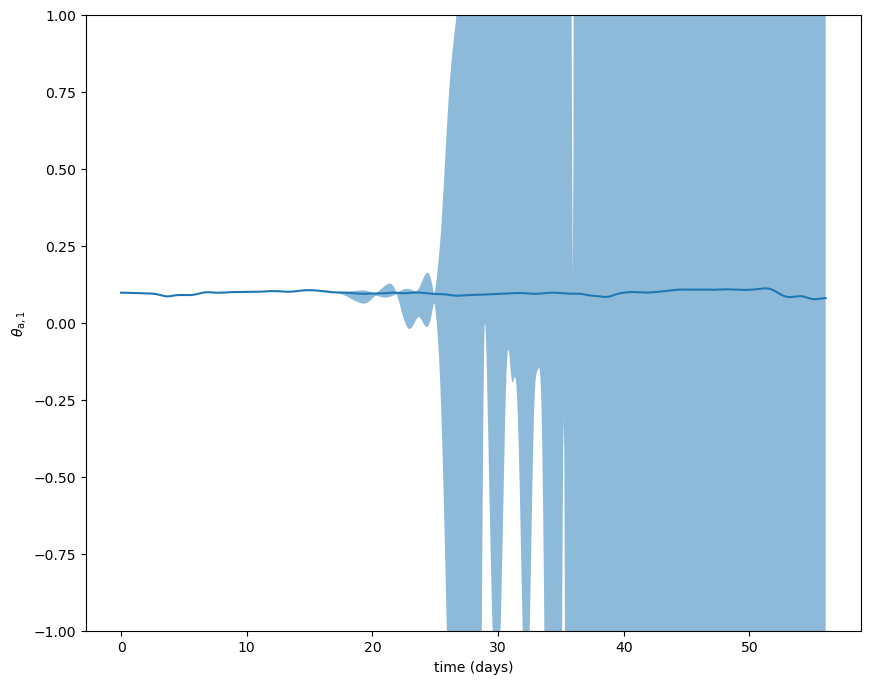

In [27]:
var = 36
plt.figure(figsize=(10, 8))

plt.plot(model_parameters.dimensional_time*time, traj[var])

ax = plt.gca()
std_plot(model_parameters.dimensional_time*time, np.mean(pert_traj[:,var], axis=0), np.sqrt(np.var(pert_traj[:, var], axis=0)), ax=ax, alpha=0.5)
plt.ylim([-1,1])
plt.xlabel('time (days)')
plt.ylabel('$'+model_parameters.latex_var_string[var]+'$');

## Showing the resulting fields (animation)

This is an advanced feature showing the time evolution of diagnostic of the model. It shows simultaneously a scatter plot of the variable $\psi_2$ and $\psi_3$, and the geopotential height field at 500 hPa over the orographic height. Please read the documentation for more information.

Creating the diagnostics:
* For the 500hPa geopotential height:

In [28]:
from qgs.diagnostics.streamfunctions import MiddleAtmosphericStreamfunctionDiagnostic
psi = MiddleAtmosphericStreamfunctionDiagnostic(model_parameters, geopotential=True)

* For the nondimensional variables $\psi_2$ and $\psi_3$:

In [29]:
from qgs.diagnostics.variables import VariablesDiagnostic
variable_nondim = VariablesDiagnostic([2, 1], model_parameters, False)

In [30]:
# setting also the background
background = VariablesDiagnostic([2, 1], model_parameters, False)
background.set_data(time, traj)

Creating a multi diagnostic with both:

In [31]:
from qgs.diagnostics.multi import MultiDiagnostic
m = MultiDiagnostic(1,2)
m.add_diagnostic(variable_nondim,
                 diagnostic_kwargs={'show_time': False, 'background': background},
                 plot_kwargs={'ms': 0.2})
m.add_diagnostic(psi,
                 diagnostic_kwargs={'style': 'contour', 'contour_labels': False},
                 plot_kwargs={'colors': 'k'})
m.set_data(time, traj)

and show an interactive animation:

In [33]:
from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Times'],'size':12})
m.animate(figsize=(20,6))

interactive(children=(IntSlider(value=500, description='time_index', max=1000), Output()), _dom_classes=('widg…